# DAVE 3625, Assignment 2
# Norwegian Airlines Stock Price Prediction

In [1]:
# Import all the necessary libraries
import pandas as pd 
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Importing the data and printing out head
data = pd.read_csv('NAS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Dropping all values set as NaN
data.dropna(inplace=True)

In [4]:
# Getting the amount of trading days.
# This shows i have 4218(!) days worth of data, approx 11.5 years
data.shape

(4218, 7)

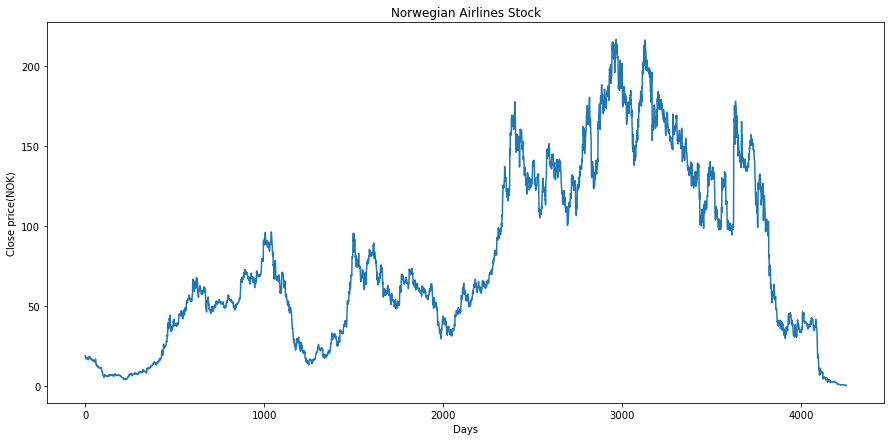

In [5]:
# Visualize the close prize data
plt.figure(figsize=(15,7))
plt.title('Norwegian Airlines Stock')
plt.xlabel('Days')
plt.ylabel('Close price(NOK)')
plt.plot(data['Close'])
plt.show()

In [10]:
# Get the close column, adding it into a separate dataframe.
datax = data[['Close']]
data.head(5)

,Date,Close
0,2003-12-18,19.139799
1,2003-12-19,18.454201
2,2003-12-22,18.054300
3,2003-12-23,17.425800
7,2003-12-29,17.254400


In [14]:
# Variable that predict 'x' days out into the future
future_days = 25
# Create a new feature (target) shifted 'x' days up
datax['Prediction'] = datax[['Close']].shift(-future_days)
# Print head 
datax.head(5)

,Close,Prediction
0,19.139799,17.1401
1,18.454201,17.0259
2,18.054300,16.7973
3,17.425800,17.0830
7,17.254400,16.8545


In [42]:
# Adding the prediction column to the preexisting dataframe that i have made.
predict = datax['Prediction']
data = data.join(predict)

In [44]:
# Also print tail to show that there are NaN values, which is to be expected
datax.tail(5)

,Close,Prediction
4248,0.6768,NaN
4249,0.6006,NaN
4250,0.6260,NaN
4251,0.6050,NaN
4252,0.6106,NaN


In [45]:
# Create a feature data set (X)
# Convert it to a numpy array and remove the last 'x' rows/days
X = np.array(datax.drop(['Prediction'],1))[:-future_days]
print(X)

[[19.139799]
 [18.454201]
 [18.0543  ]
 ...
 [ 1.054   ]
 [ 1.042   ]
 [ 1.0425  ]]


In [46]:
# Create the target data set (y) and convert it to a numpy array
# Get all of the target values except the last 'x' days
y = np.array(datax['Prediction'])[:-future_days]
print(y)

[17.1401 17.0259 16.7973 ...  0.626   0.605   0.6106]


In [47]:
# Splitting the data into 75% training and 25% testing
# Creating several variables
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [48]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [49]:
# Get the last 'x' rows of the feature data set
# Creating variable x_future
x_future = datax.drop(['Prediction'], 1)[-future_days:]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[1.0445],
       [1.047 ],
       [1.0475],
       [1.0325],
       [1.0445],
       [1.014 ],
       [1.017 ],
       [1.    ],
       [0.955 ],
       [0.8674],
       [0.9148],
       [0.92  ],
       [0.94  ],
       [1.    ],
       [1.    ],
       [0.989 ],
       [0.99  ],
       [0.9226],
       [0.9178],
       [0.6964],
       [0.6768],
       [0.6006],
       [0.626 ],
       [0.605 ],
       [0.6106]])

In [50]:
# Show the model tree prediction
# Creating variable tree_prediction
tree_prediction = tree.predict(x_future)
# Print the array
print(tree_prediction)

[0.626  0.626  0.626  0.626  0.626  0.9178 0.9178 0.9178 0.9178 0.9178
 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178
 0.9178 0.9178 0.9178 0.9178 0.9178]


In [51]:
# Show the model linear regression prediction
# Creating variable lr_prediction
lr_prediction = lr.predict(x_future)
# Print the array
print(lr_prediction)

[3.55528004 3.55769485 3.55817781 3.54368896 3.55528004 3.52581938
 3.52871715 3.51229646 3.46882992 3.38421505 3.42999981 3.43502261
 3.45434107 3.51229646 3.51229646 3.50167131 3.50263723 3.43753401
 3.43289758 3.21904219 3.2001101  3.12650675 3.1510412  3.13075682
 3.13616599]


# Decision Tree Model

<ipython-input-115-5db9e1a24f7e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


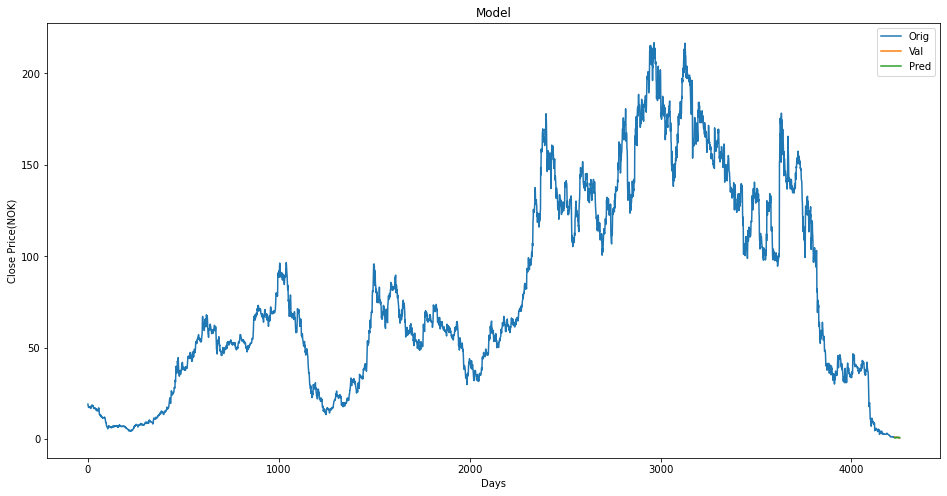

In [115]:
# Visualize all the data
# Creating variable predictions and valid
predictions = tree_prediction

valid = datax[X.shape[0]:]
valid['Predictions'] = predictions
# Creating the figure and labelling the axes
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price(NOK)')
# Plotting the data
plt.plot(data['Close'])
plt.plot(valid[['Close', 'Predictions']])
# Placing legend on the axes
plt.legend(['Orig', 'Val', 'Pred'])
# Show plot 
plt.show()

# Linear Regression Model

<ipython-input-83-0574969779d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


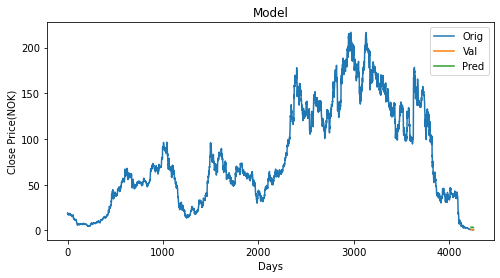

In [83]:
# Visualize all the data
# Creating variable predictions and valid
predictions = lr_prediction

valid = datax[X.shape[0]:]
valid['Predictions'] = predictions
# Creating the figure and labelling the axes
plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price(NOK)')
# Plotting the data
plt.plot(data['Close'])
plt.plot(valid[['Close', 'Predictions']])
# Placing legend on the axes
plt.legend(['Orig', 'Val', 'Pred'])
# Show plot 
plt.show()

# Price for a specific day

Now that i have plotted with the two ML models, it is time to predict the price for a specific day. 
I have chosen 2017-04-07 as my specific date.

In [65]:
# Assigning the date i have chosen as variable 'mydate'
mydate = '2017-04-07'
# Locating the row where my chosen date lies.
# This also reveals the predicted price and the real price for the stock.
data.loc[data['Date'] == mydate]

,Date,Close,Prediction
3371,2017-04-07,135.350006,125.865997


The real price for the date 2017-04-07 is 135.350006 NOK.
The predicted price for the date is 125.865997 NOK.

To find out the prediction percentage score i have calculated this with the prices shown in the cell over.

In [109]:
percent=100-round(((abs(125.865997 - 135.350006)/135.350006)*100),2)

In [114]:
print("The prediction score for this date is "+str(percent)+"%")

The prediction score for this date is 92.99%
